# Universities Private / Public 

By: Andrew Wairegi

**Description:**

Apps - Number of Application recieved <br> 
Accept - Number of applicants accepted <br> 
Enroll - Number of new students enrolled <br> 
Top10perc - New students from 10% of high schools <br> 
Top25perc - New students from top 25% of high schools <br> 
F.undergrad - Number of full-time undergraduates <br> 
P.Undergrad - Number of part-time undergraduates <br> 
Outstate - Out of state tuition cost <br> 
Room.Board - Room and board costs <br> 
Books - Estimated book costs <br> 
Personal - Estimated personal spending <br> 
PhD - Percent of faculty with Ph.D's <br> 
Terminal - Percent of faculty with terminal degree <br> 
S.F.Ratio - Student/faculty ratio <br> 
perc.alumni - Percent of alumni who donate <br> 
Expend - Instructional expenditure per student <br> 
Grad.Rate - Graduation rate

## 1. Defining the Question 

<a name = "defining_question">

### a) Specifying the question

To be able to differentiate between private & public universities, using K-means clustering.

### b) Defining Metric for success

Being able to identify new points, with an accuracy of 70%, and above.

### c) Understanding the context

Universities, have many features that they share amongst themeselves. We want to be able to differentiate between a public & private university using their features.

### d) Experimental design

**Process:**

1. <a href = "#defining_question">  Defining the question </a>
2. <a href = "#data_loading"> Reading the Data  </a>
3. <a href = "#previewing_data"> Previewing Data </a>
4. <a href = "#cleaning_data"> Data Cleaning </a>
5. <a href = "#EDA"> Exploratory Data analysis (EDA) </a>
6. <a href = "#implementing_solution"> Implementing the solution </a>
7. <a href = "#conclusion"> Conclusion </a>
8. <a href = "#recommendation"> Recommendations </a>
9. <a href = "#follow_questions">  Follow up questions </a>

### e) Data relevance

This dataset has been sourced from an original source. So I believe it is a valid dataset. It is the official dataset, that is also included in R datasets.

## 2. Reading the data

<a name="data_loading"/>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("College_Data.csv")#
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

## 3. Previewing the data

<a name = "previewing_data"/>

In [ ]:
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [ ]:
df.tail()

Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [ ]:
df.shape

(777, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

## 4. Cleaning the Data

<a name = "cleaning_data">

In [ ]:
# All the values are non-null so we don't need to drop any columns
# or fill in any values

In [ ]:
# 1. Drop unnamed column
df.drop("Unnamed: 0", axis = 1, inplace = True)

## 5. Exploratory Data analysis

<a name = "EDA">

In [ ]:
# We're going to explore that data with different fields.
# To see the differentiation between private & public universities, using the target feature.

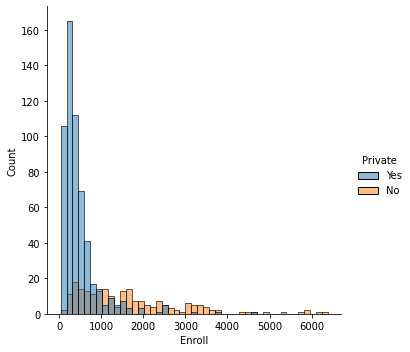

In [ ]:
sns.displot(data = df, x = "Enroll", hue = "Private")

In [ ]:
# It seems public universities, had more students enrolled than private.
# Which means they were bigger.

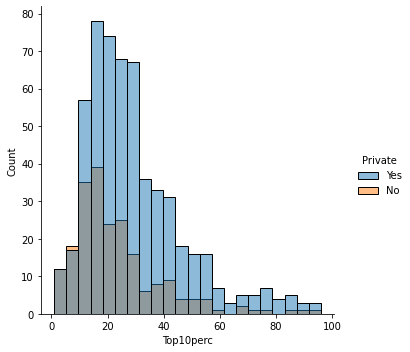

In [ ]:
sns.displot(data = df, x = "Top10perc", hue = "Private")

In [ ]:
# Private universities had more students enrolled
# from schools that performed well, in their end of year exams.

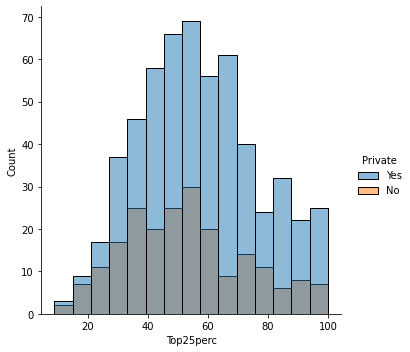

In [ ]:
sns.displot(data = df, x = "Top25perc", hue = "Private")

In [ ]:
# Private universities still had more of the students, from
# high performing high schools.

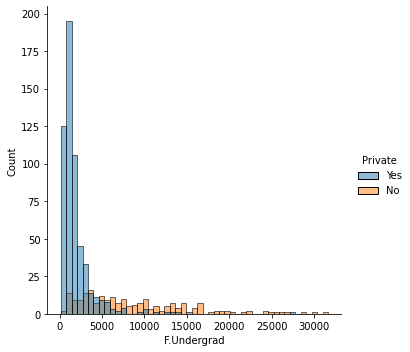

In [ ]:
sns.displot(data = df, x = "F.Undergrad", hue = "Private")

In [ ]:
# Public univiersities had more Full time graduates
# This is because they were much bigger than private universities.

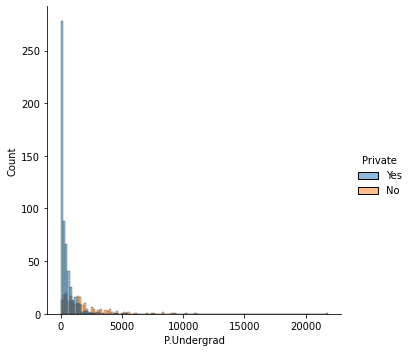

In [ ]:
sns.displot(data = df, x = "P.Undergrad", hue = "Private")

In [ ]:
# The same can be said for part time undergradutes.
# They had more part-time undergraduates, because they were bigger.

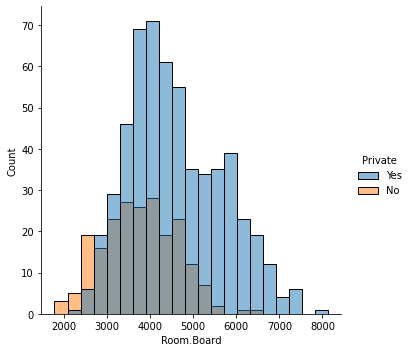

In [ ]:
sns.displot(data = df, x = "Room.Board", hue = "Private")

In [ ]:
# Private universities had more expensive room & board,
# than public universities. Most probably because they are known
# to provide better establishements.

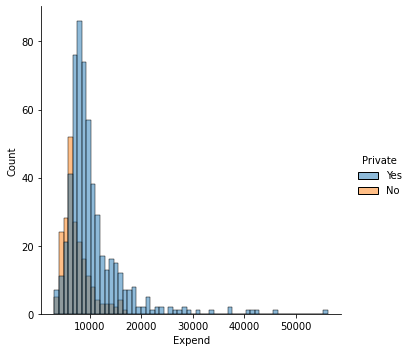

In [ ]:
sns.displot(data = df, x = "Expend", hue = "Private")

In [ ]:
# The expenditure of private universities is much higher. This is because they
# charge much higher amounts, than public universities. This is what they are known
# to do.

In [ ]:
# We have some good variables here. That can be used for differentiating
# the two clusters well. This can be done with all the variables that have
# been provided.

## 6. Implementing the Solution

<a name = "implementing_solution">

### X & Y

In [ ]:
X = df.drop("Private", axis = 1)
y = df["Private"]

### Data preparation

In [ ]:
y = y.replace({"Yes": 1, "No": 0})

### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state = 101)

### Modelling

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train)

KMeans(n_clusters=2)

### Evaluation

#### Existing data

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = kmeans.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.20      0.67      0.31       168
           1       0.31      0.05      0.09       469

    accuracy                           0.22       637
   macro avg       0.26      0.36      0.20       637
weighted avg       0.28      0.22      0.15       637



In [ ]:
# predictions are bad. However, we were able to get some points,
# classified correctly. This could be due to the bad differentiation between points.
# In the columns. So there was a lot of overlap, which made it hard to classify points
# as public or private. This makes sense since we could see it in the visualizations.

#### New data

In [ ]:
predictions = kmeans.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.23      0.59      0.33        44
           1       0.33      0.09      0.15        96

    accuracy                           0.25       140
   macro avg       0.28      0.34      0.24       140
weighted avg       0.30      0.25      0.20       140



In [ ]:
# There are still quite a few points that were wrong. But it's
# still explained by the overlap.

## Conclusions

<a name = "conclusion">

In conclusion, I believe we can use the K means clustering model. To correctly classify if a University is private. However, we can only do so with 33% accuracy. This means that we will be wrong, 67% of the time. However, this is the only class that has a high score.

## Recommendations

<a name = "recommendation">

I recommend that we use another way to determine whether a university if public / not. By example, using intuition. By examinig the cost of a university and other features, we can determine if it is private or public. This is because we will have a much better idea, of whether a university is private or not by looking at the features. However, if it had labels we would much better be able to classify whether a university was public or not. By using something like logistic regression.

## 9. Follow up questions

<a name = "follow_questions">

### a) Did we have the right data ?

Yes, I believe we had the right data. As we had a lot of data from the united states, about private / public universities. It also had a lot of fields, so it was easy to diffrentiate.

### b) Do we need other data to answer our question ?

No, I don't believe we need other data. As we had many fields, and the differentiation was clear. However, I believe we need another model.

### c) Did we have the right question ?

Yes, I believe we had the right question. As we wanted to differentiate between a public & private university. We also got a lot of data, regarding that.

<br>
<center> <h4> <b> Copyright © Andrew Wairegi </b> </h4> </center>

